# Introduction


## Importing necessary python libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting
import matplotlib.image as mpimg
import seaborn as sns # to generate stylised plots

### Loading the input file

In [2]:
df = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')

### Glimpse at each column of the data

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Descriptive statistics on each column

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Check for any missing data

In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

#### Correlations between each columns

<AxesSubplot:>

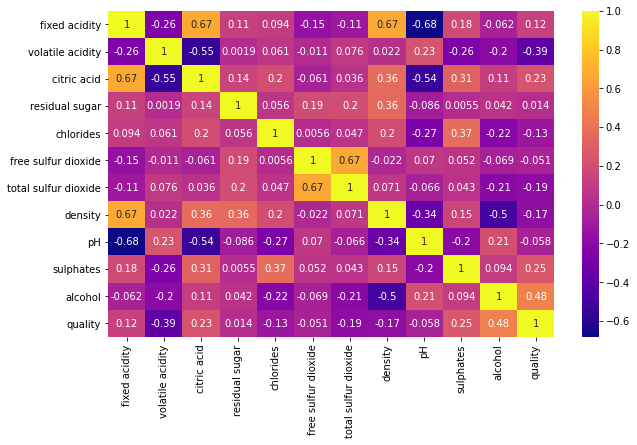

In [7]:
fig,ax = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),cmap = 'plasma', annot= True)

#### Let's display the barplot of the correlations of various columns with 'quality'

<AxesSubplot:>

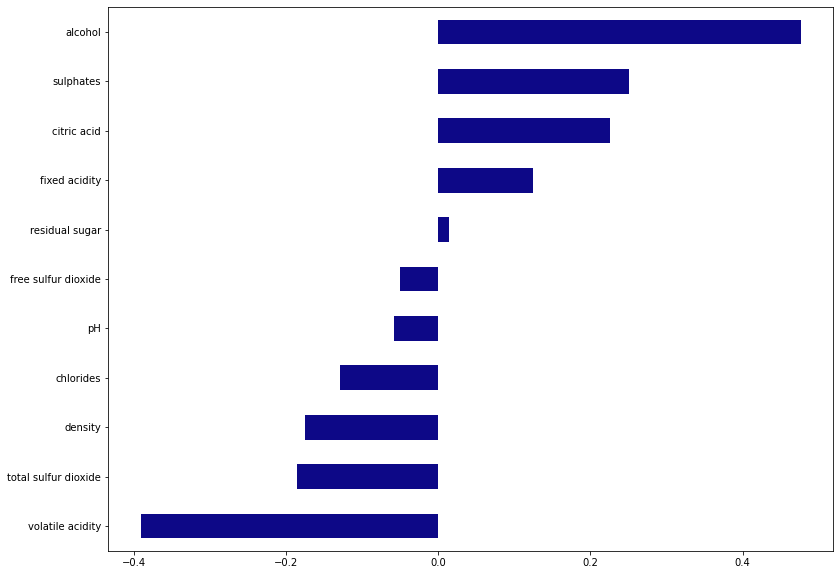

In [8]:
df.corr()['quality'][:-1].sort_values().plot(kind = 'barh',figsize = (13,10), colormap = 'plasma')

#### List of labels available for prediction :

In [9]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Let's put aside the regression modelling and try doing a classification model which predicts whether the wine is good or not

In [10]:
df['quality_binary'] = df.quality.apply(lambda x : 1 if x >6 else 0)

In [11]:
df.quality_binary.value_counts()

0    1382
1     217
Name: quality_binary, dtype: int64

In [12]:
X = df.drop(columns = ['quality','quality_binary']).values
y = df.quality_binary.values.reshape(-1, 1)

## Feature Engineering

In [13]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X)
X_new = X_scaler.transform(X)
#y_scaler = MinMaxScaler().fit(y)
#y_new = y_scaler.transform(y)

#### Split train set and test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,train_size= 0.75, random_state= 101)

#### Instantiate a Decision Tree classifier

In [15]:
from sklearn import tree
model1 = tree.DecisionTreeClassifier()
model1.fit(X_train,y_train)

DecisionTreeClassifier()

#### Predicting the outputs for the test set 'X_test'

In [16]:
y_pred = model1.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score, auc
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       346
           1       0.47      0.61      0.53        54

    accuracy                           0.85       400
   macro avg       0.70      0.75      0.72       400
weighted avg       0.87      0.85      0.86       400

[[309  37]
 [ 21  33]]


In [18]:
roc_auc_score(y_test, y_pred )

0.75208734746307

In [19]:
feature_set = df.drop(columns = ['quality','quality_binary']).columns

####  A High level look into the decision tree with the depth of 2

In [20]:
import graphviz 
import pydot
dot_data = tree.export_graphviz(model1, 
                     feature_names=feature_set,
                     out_file = 'class_tree.dot',
                     class_names='quality',  
                     filled=True, rounded=True,  
                     special_characters=True)  
(graph,) = pydot.graph_from_dot_file('class_tree.dot')
graph.write_png('DT_classifier.png')

#### Display the Decision tree classifer which predicts if the wine is of good quality or not

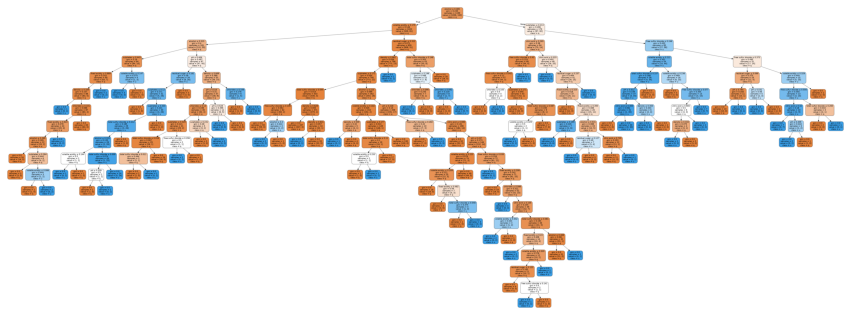

In [21]:
plt.subplots(figsize = (15,15))
plt.axis('off')
plt.imshow(mpimg.imread('DT_classifier.png'))

#### Lets predict the output quality using the regression model

In [22]:
X = df.drop(columns = ['quality','quality_binary']).values
y = df.quality.values.reshape(-1,1)
X_scaler = MinMaxScaler().fit(X)
X_new = X_scaler.transform(X)
y_scaler = MinMaxScaler().fit(y)
y_new = y_scaler.transform(y)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new,train_size= 0.75, random_state= 101)

#### Train the Decision tree regressor using the scaled data set

In [24]:
model2 = tree.DecisionTreeRegressor()
model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [25]:
y_pred = model2.predict(X_test)

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.021133824495866538
0.10350000000000006
0.02830000000000002


In [27]:
dot_data2 = tree.export_graphviz(model2, 
                     feature_names=feature_set,
                     out_file = 'regression_tree.dot',
                     class_names='quality',  
                     filled=True, rounded=True,  
                     special_characters=True) 
graphviz.Source(dot_data)
(graph2,) = pydot.graph_from_dot_file('regression_tree.dot')
graph2.write_png('DT_regressor.png')

#### Display the Decision tree regressor which estimates the quality of wine 

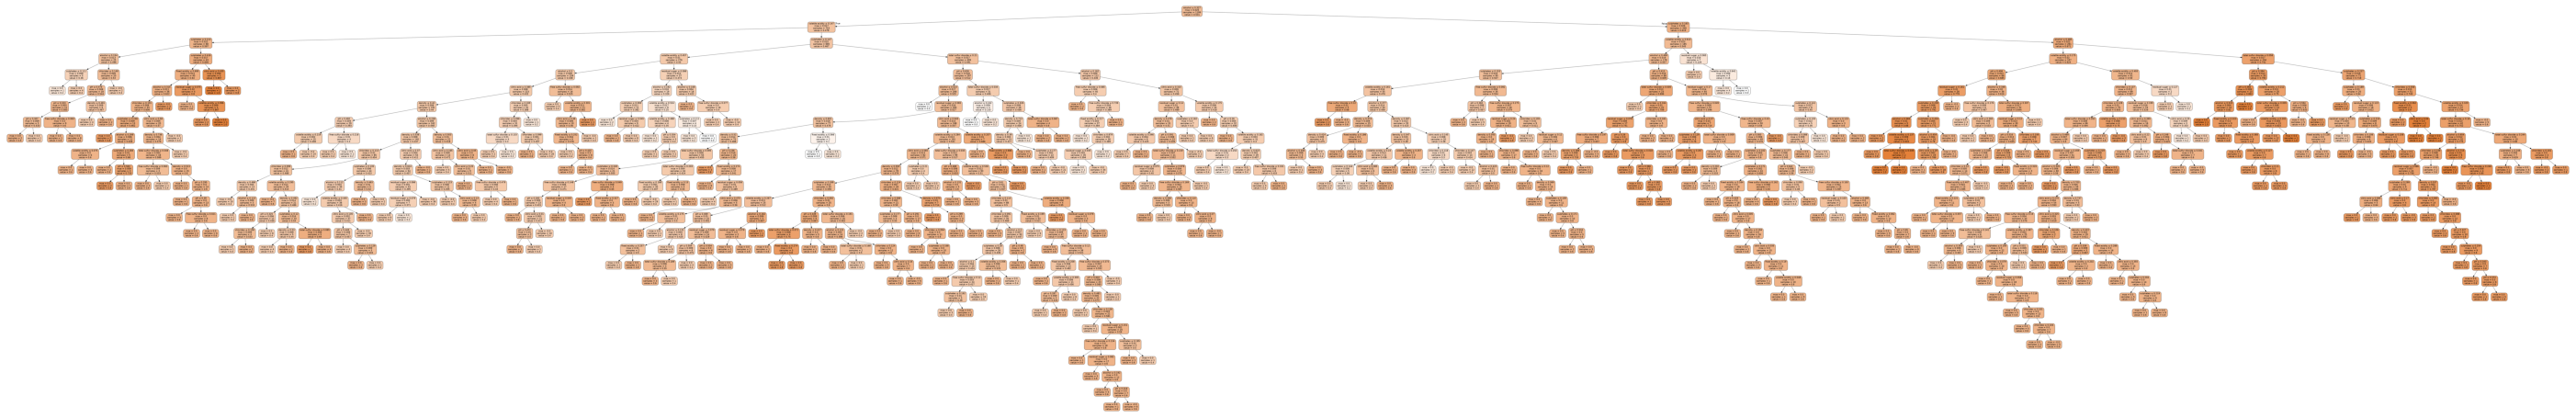

In [28]:
plt.subplots(figsize = (50,15))
plt.axis('off')
plt.imshow(mpimg.imread('DT_regressor.png'))